## Submission By : VASAMSETTI LIKHITHA

## EMAIL SPAM DETECTION WITH MACHINE LEARNING

## Data Science Internship

## TASK-3

## Importing required libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Preparing the data

In [54]:
data=pd.read_csv("C:/Users/LIKHITHA/OneDrive/Documents/spam.csv",encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploring the data

In [55]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [56]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [57]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [58]:
data.shape

(5572, 5)

In [59]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [61]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [62]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                                                                                                                                  30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                                                                     12
Ok...                                                                                                                                                                                                                                                                                   10
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettod

In [63]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [64]:
#removing unwanted columnns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [65]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [66]:
#Replacing v1,v2 with Class(spam/ham), Mail
data.rename(columns={'v1':'Class','v2':'Mail'},inplace=True)
data.columns

Index(['Class', 'Mail'], dtype='object')

## Label Encoding

In [67]:
# spam=0
# ham=1
data.loc[data['Class']=='spam','Class',]=0
data.loc[data['Class']=='ham','Class',]=1

## Data Visualization

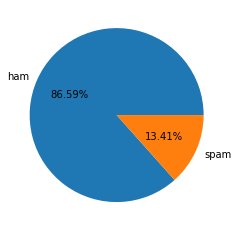

In [68]:
l=['ham','spam']
s=data['Class'].value_counts()
plt.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

<AxesSubplot:ylabel='Frequency'>

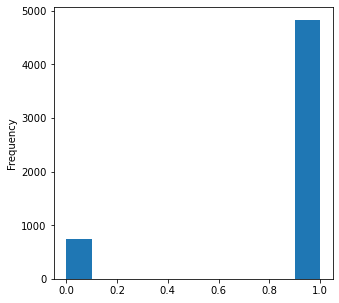

In [69]:
data['Class'].plot(bins=10,kind='hist',figsize=(5,5))

## Train - Test - Split

In [70]:
X=data['Mail']
Y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Feature Extraction

In [71]:
f=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
xtrain_f=f.fit_transform(X_train)
xtest_f=f.fit_transform(X_test)

In [72]:
#convert y_train, y_test values as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Model Building and Evaluation

In [73]:
model=LogisticRegression()
model.fit(xtrain_f,y_train)
pred_train=model.predict(xtrain_f)
accuracy=accuracy_score(y_train,pred_train)
print("accuracy is:",accuracy)
cnf=metrics.confusion_matrix(y_train,pred_train)
cnf

accuracy is: 0.9694862014808167


array([[ 463,  134],
       [   2, 3858]], dtype=int64)

In [ ]:
THANK YOU